## Import the necessary packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import 

## Create a random dataset for the travelling salesman problem

In this project we will investigate a problem with 30 nodes and (30*29)/2 = 435 weighted edges. Assume the cost to travel from one city to another is equivalent to that of returning from another city, i.e. The Symmetric TSP. Also we assume the cost of travelling from A to B, then to C is always greater than or equal to travelling directly from A to C, i.e. it satisfies the triangle inequality. 

In [3]:
np.random.seed(42)

In [8]:
X = np.random.uniform(-10,10,(30,))
X

array([ 6.1488031 ,  7.921826  , -3.6399305 , -7.79896151, -5.44129675,
       -1.45784423,  6.36029532,  7.21461167, -9.86095739,  0.21494605,
       -1.65177994, -5.55784379, -7.60269265, -3.24769657,  8.85819408,
       -3.53594136,  0.37581243,  4.06037918, -2.72740795,  9.43564165,
        9.2489459 , -4.96435408, -0.05502988, -3.9824338 , -4.30319011,
       -9.26226105,  2.19128668,  0.05358046, -8.97042498, -4.42707072])

In [7]:
Y = np.random.uniform(-10,10,(30,))
Y

array([-7.60811508,  4.26489574,  5.21570097,  1.22554395,  5.4193436 ,
       -0.12408807,  0.45465659, -1.44917963, -9.49161747, -7.84217146,
       -9.37141629,  2.72820823, -3.71288038,  0.17141382,  8.15132948,
       -5.01415542, -1.79234154,  5.11102277, -5.42403669, -8.4604018 ,
       -4.20497094, -6.77557425,  8.59395305,  6.16240759,  2.66807513,
        7.4292118 ,  6.07344154, -6.26859882,  7.85117997,  0.78684484])

In [9]:
Nodes = [(x,y) for x,y in zip(X,Y)]
Nodes

[(6.148803103281249, -7.608115081233966),
 (7.921825998469863, 4.264895744459899),
 (-3.6399305005627225, 5.215700972337949),
 (-7.798961509446465, 1.2255439513899251),
 (-5.441296749161166, 5.419343599091221),
 (-1.4578442274748742, -0.12408807271218514),
 (6.360295318449861, 0.4546565876398816),
 (7.214611665126867, -1.4491796328290079),
 (-9.860957389376185, -9.491617465118097),
 (0.21494605155131552, -7.842171460133911),
 (-1.6517799370244202, -9.371416286265315),
 (-5.557843790585395, 2.7282082252756084),
 (-7.6026926533263435, -3.712880378473466),
 (-3.247696571927441, 0.1714138232940563),
 (8.858194078250385, 8.151329478521859),
 (-3.5359413595848954, -5.014155417022501),
 (0.3758124348673224, -1.7923415392874062),
 (4.060379177903556, 5.1110227708609735),
 (-2.7274079524141204, -5.424036690167551),
 (9.435641654419214, -8.46040180342414),
 (9.248945898842223, -4.204970941724639),
 (-4.964354083492717, -6.775574254919912),
 (-0.0550298821522901, 8.59395304685146),
 (-3.982433803

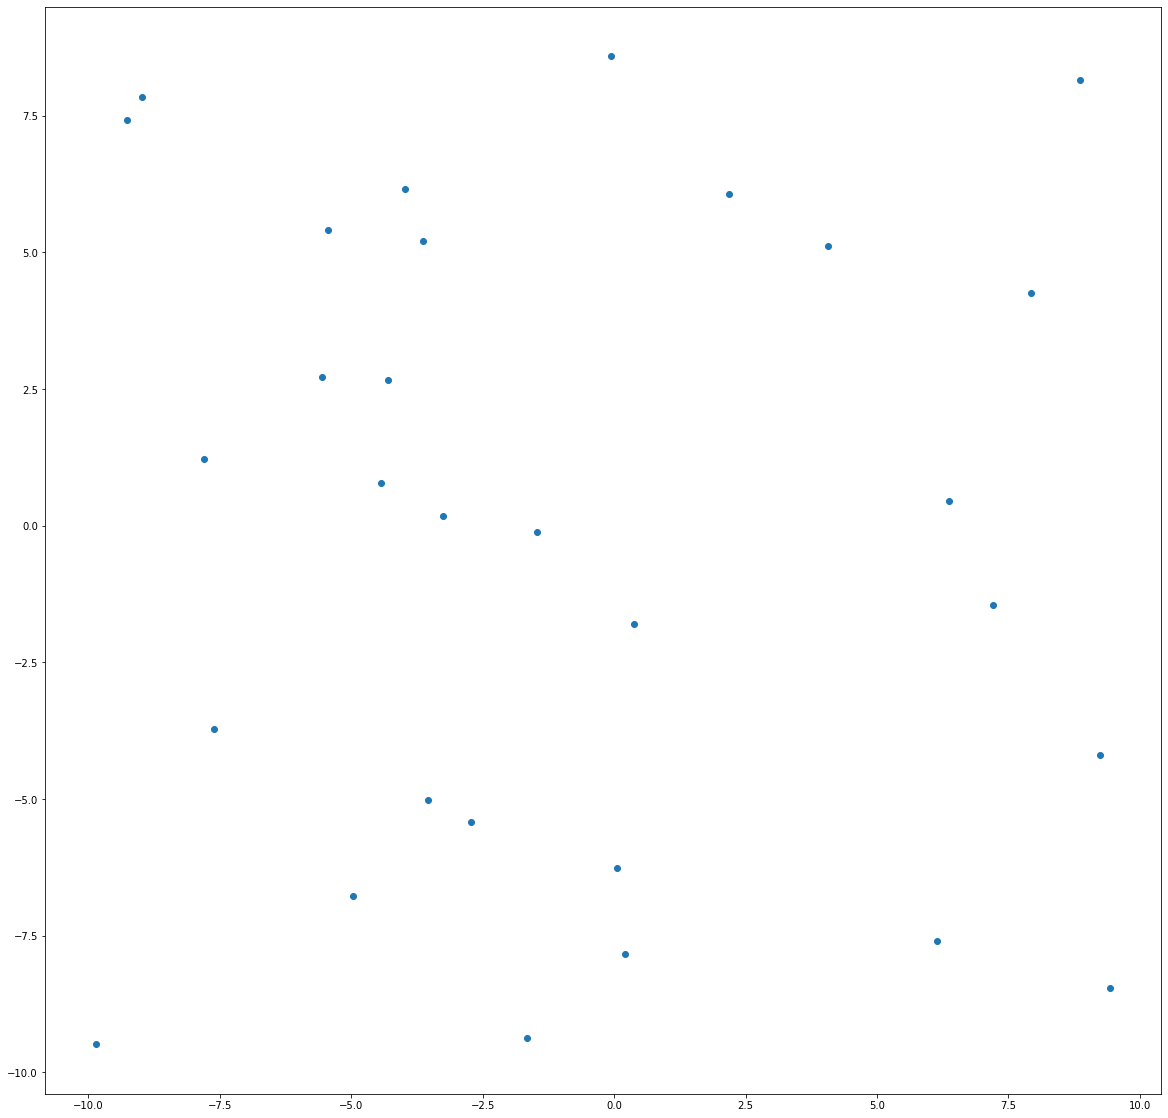

In [15]:
plt.figure(figsize=(20,20))
plt.scatter(X,Y)

In [30]:
Edges = []

for node1 in Nodes:
    edge = []
    for node2 in Nodes:
        edge.append(np.sqrt((node1[0]-node2[0])**2.0  + (node1[1]-node2[1])**2.0))
    Edges.append(edge)

Edges = np.array(Edges)
Edges

array([[ 0.        , 12.0046656 , 16.13287215, 16.50980526, 17.43688889,
        10.67107042,  8.06554499,  6.25047468, 16.12017408,  5.93847134,
         7.99739501, 15.61682301, 14.29253263, 12.19898668, 15.99065015,
        10.02611101,  8.1945496 , 12.88945236,  9.14096938,  3.39554124,
         4.60350686, 11.1442984 , 17.34919466, 17.09588418, 14.65756622,
        21.53188562, 14.24243405,  6.24067647, 21.62361813, 13.50275746],
       [12.0046656 ,  0.        , 11.60078635, 16.01189618, 13.41289676,
        10.35574201,  4.11780287,  5.75767397, 22.48263865, 14.35190144,
        16.6614206 , 13.56697852, 17.45438602, 11.89600053,  3.99764335,
        14.74385375,  9.67638591,  3.95306242, 14.39727736, 12.81502382,
         8.57320762, 16.96896034,  9.07584524, 12.05454075, 12.32886268,
        17.47300043,  6.00915292, 13.1477677 , 17.26874568, 12.82934481],
       [16.13287215, 11.60078635,  0.        ,  5.76358326,  1.8128405 ,
         5.76843545, 11.07574196, 12.73741415, 15